# Introduzione ai GIS<br/><small>dati vettoriali</small>

## obiettivi della lezione
- i dati vettoriali e il formato ESRI Shapefile
- il geodataframe in geopandas
- le proiezioni spaziali

**dati utilizzati:**

- [ISTAT](https://www.istat.it/it/archivio/222527) Istituto Italiano di Statistica

### requisiti

- conoscenza di R


### status

_"La terra non è piatta!!!"_


---

![](https://user-images.githubusercontent.com/520851/50280460-e35c1880-044c-11e9-9ed7-cc46754e49db.jpg)

# Spatial feature
https://r-spatial.github.io/sf/

In [1]:
options(warn = -1)
if (!require(sf)) {
  install.packages("sf")
}
library("sf")

Loading required package: sf

Linking to GEOS 3.12.1, GDAL 3.9.1, PROJ 9.4.1; sf_use_s2() is TRUE



## Importiamo dati geospaziali

Simple Features supporta tutti i formati vettoriali supportati [gdal/ogr](https://www.gdal.org/ogr_formats.html) 

In questo tutorial useremo i dati offerti da [ISTAT](https://istat.it)

### dati delle unità amministrative
[https://www.istat.it/it/archivio/222527](https://www.istat.it/it/archivio/222527)

Il file zip con i confini amministrativi del 2024 è disponibile e questo indirizzo
<br/>
[https://www.istat.it/storage/cartografia/confini_amministrativi/generalizzati/2024/Limiti01012024_g.zip](https://www.istat.it/storage/cartografia/confini_amministrativi/generalizzati/2024/Limiti01012024_g.zip)

### download dei dati

In [2]:
# Controlla se la directory esiste
if (!dir.exists("Limiti01012024_g")) {
  # URL del file zip
  zip_file_url <- "https://www.istat.it/storage/cartografia/confini_amministrativi/generalizzati/2024/Limiti01012024_g.zip"
  zip_file_name <- "Limiti01012024_g.zip"
  # Scarica il file zip
  download.file(zip_file_url, zip_file_name, mode = "wb")

  # Decomprime il file zip
  unzip(zip_file_name)
}

In [3]:
# Mostra tutti i file nella directory corrente e nelle sottodirectory
list_files <- function(path = ".") {
  # Elenca tutti i file in modo ricorsivo
  files <- list.files(path = path, recursive = TRUE, full.names = FALSE)
  # Stampa ciascun file
  for (file in files) {
    print(file)
  }
}

In [4]:
# Elencare i file nella directory corrente
list.files()

[1] "01_SNA_datascience_geospatial.ipynb" "02_SNA_datascience_geospatial.ipynb"
 [3] "03_SNA_datascience_geospatial.ipynb" "04_SNA_datascience_geospatial.ipynb"
 [5] "apt.txt"                             "data"                               
 [7] "environment.yml"                     "images"                             
 [9] "install.R"                           "Limiti01012024_g"                   
[11] "Limiti01012024_g.zip"                "postBuild"                          
[13] "README.md"                           "runtime.txt"

In [5]:
list.files(path = "Limiti01012024_g")

[1] "Com01012024_g"    "ProvCM01012024_g" "Reg01012024_g"    "RipGeo01012024_g"

In [6]:
# Cambia la directory di lavoro a 'Limiti01012024_g'
setwd("Limiti01012024_g")

# Verifica la directory corrente
getwd()

[1] "/home/jovyan/Limiti01012024_g"

In [7]:
list.files()

[1] "Com01012024_g"    "ProvCM01012024_g" "Reg01012024_g"    "RipGeo01012024_g"

Limiti01012023_g => la cartella con i confini generalizzati delle varie unità amministrative italiane a 2023
- RipGeo01012024_g<br/>&nbsp;cartella con i confini delle macroregioni d'Italia
- Reg01012024_g<br/>&nbsp;cartella con i confini regionali
- ProvCM01012024_g<br/>&nbsp;confini provinciali
- Com01012024_g<br/>&nbsp;confini comunali

#### Esploriamo le macroregioni

In [8]:
# Cambia la directory di lavoro a 'Limiti01012024_g'
setwd("RipGeo01012024_g")

In [9]:
getwd()

[1] "/home/jovyan/Limiti01012024_g/RipGeo01012024_g"

In [10]:


# Esegui la funzione per la directory corrente
list_files(".")


[1] "RipGeo01012024_g_WGS84.cpg"
[1] "RipGeo01012024_g_WGS84.dbf"
[1] "RipGeo01012024_g_WGS84.prj"
[1] "RipGeo01012024_g_WGS84.shp"
[1] "RipGeo01012024_g_WGS84.shx"


### ESRI Shapefile

questo è uno *ESRI Shapefile* (un formato vecchio ma molto diffuso per distribuire dati geospaziali vettoriali)

Il formato è proprietario ed alcune specifiche di base sono state rese pubbliche.
Un "ESRI Shapefile" è una collezione di diversi file con lo stesso nome ed estensione diversa.

Le specifiche pubbliche sono per queste estensioni

| estensione | significato       | contenuto del file                                                  |
| --------- | ------------- | -------------------------------------------------------------------- |
| .shp      | shape (forma)         | le geometrie (punti, linee, poligoni)                                |
| .dbf      | file database | gli attributi da assocciati alle geometrie                     |
| .shx      | indici degli shape | gli indici per associare le geometrie agli attributi               |
| .prj      | proiezione    | una stringa di testo strutturata che contiene le regole della proiezione usata |

Pe gestire i dati sono _necessai_ almeno 3 file (*.shp, .shx, and .dbf*), ma il file *.prj* è fondamentale per analizzare le informazioni in particolare quando lo si incrocia con altri.

Oltre ai 4 citati è possibile che un ESRI Shapefile abbia ulteriori file.

Maggiori informazioni [qui](https://www.esri.com/library/whitepapers/pdfs/shapefile.pdf

In [11]:
#sf_use_s2(FALSE)

In [12]:
# Leggere il file shapefile
macroregions <- st_read("RipGeo01012024_g_WGS84.shp")

Reading layer `RipGeo01012024_g_WGS84' from data source 
  `/home/jovyan/Limiti01012024_g/RipGeo01012024_g/RipGeo01012024_g_WGS84.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 5 features and 4 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 313279.3 ymin: 3933826 xmax: 1312016 ymax: 5220292
Projected CRS: WGS 84 / UTM zone 32N


In [13]:
# Verifica il tipo di oggetto
class(macroregions)

[1] "sf"         "data.frame"

Si tratta di un data.frame R con la colonna "geometry" su cui applicare [https://r-spatial.github.io/sf/reference/index.html](funzioni geospaziali)

In [14]:
colnames(macroregions)

[1] "COD_RIP"    "DEN_RIP"    "Shape_Leng" "Shape_Area" "geometry"

print(macroregions)

Es.
calcolare l'area di ogni geometria

In [15]:
st_area(macroregions$geometry)

Units: [m^2]
[1] 57930826800 62396110675 58030006351 73781812999 49930616360

**rappresentazione**

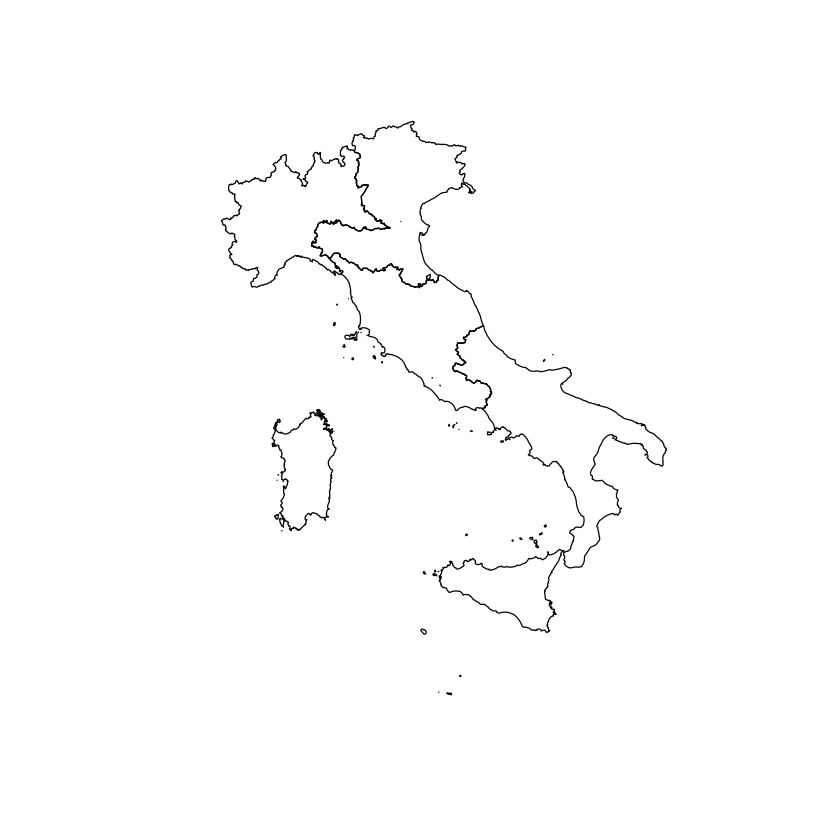

In [16]:
plot(macroregions$geometry)

... ed ora è possibile utilizzare tutti **i classici methodi di un DataFrame .**

Es.

estrarre un DataFrame filtrando per un attributo

In [17]:
# Seleziona la colonna 'DEN_RIP'
den_rip <- macroregions[["DEN_RIP"]]

In [18]:
den_rip

[1] "Nord-ovest" "Nord-est"   "Centro"     "Sud"        "Isole"

In [19]:
# Ottieni i valori unici della colonna 'DEN_RIP'
unique_den_rip <- unique(macroregions$DEN_RIP)

# Visualizza i valori unici
print(unique_den_rip)

[1] "Nord-ovest" "Nord-est"   "Centro"     "Sud"        "Isole"     


In [20]:
islands <- macroregions[macroregions$DEN_RIP == "Isole", ]

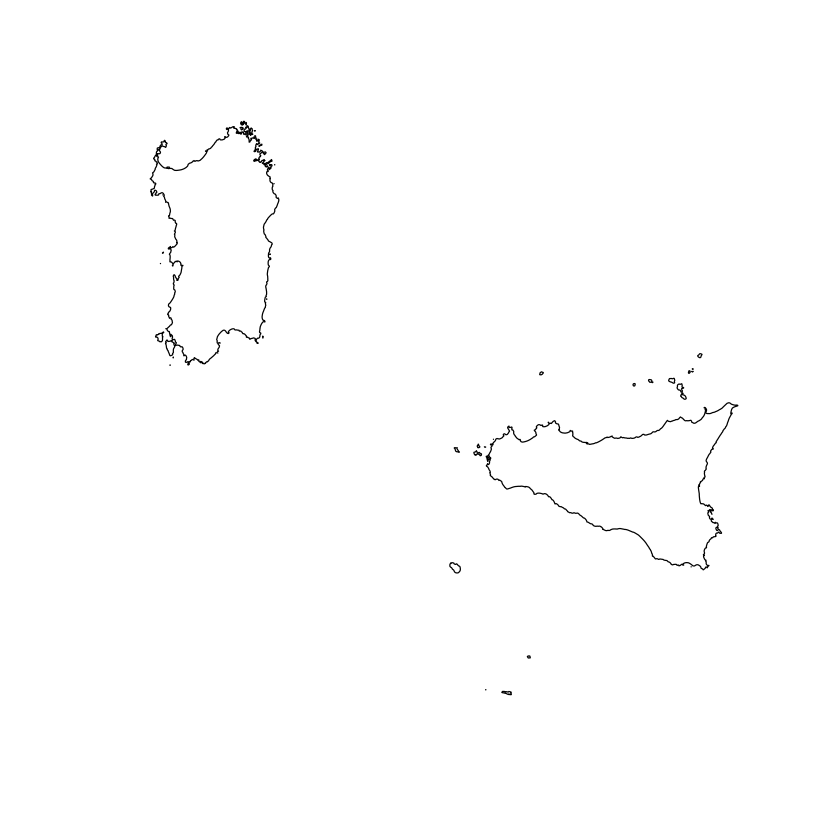

In [21]:
plot(islands$geometry)

In [22]:
st_geometry_type(macroregions)

[1] MULTIPOLYGON MULTIPOLYGON MULTIPOLYGON MULTIPOLYGON MULTIPOLYGON
18 Levels: GEOMETRY POINT LINESTRING POLYGON MULTIPOINT ... TRIANGLE

In un *ESRI shapefile* il tipo di geometria *è sempre la stessa*, ma in un *geodataframe* accetta anche *geometrie miste* per ogni colonna.

Nel nostro caso abbiamo un MultiPolygon<br/>
Le geometrie possibili sono:

|geometria|imaggine|
|:--|--:|
|POINT|![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c2/SFA_Point.svg/51px-SFA_Point.svg.png)|
|LINESTRING|![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/SFA_LineString.svg/51px-SFA_LineString.svg.png)|
|LINEARRING|![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/docs/assets/images/linering.png)|
|POLYGON|![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/SFA_Polygon.svg/51px-SFA_Polygon.svg.png)![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/SFA_Polygon_with_hole.svg/51px-SFA_Polygon_with_hole.svg.png)
|MULTIPOINT|![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d6/SFA_MultiPoint.svg/51px-SFA_MultiPoint.svg.png)
| MULITLINESTRING|![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/86/SFA_MultiLineString.svg/51px-SFA_MultiLineString.svg.png)|
| MULTIPOLYGON |![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3b/SFA_MultiPolygon_with_hole.svg/51px-SFA_MultiPolygon_with_hole.svg.png)|
| GEOMETRYCOLLECTION |![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1d/SFA_GeometryCollection.svg/51px-SFA_GeometryCollection.svg.png) |

nota: questa tabella deriva dalla pagina [WKT](https://en.wikipedia.org/wiki/Well-known_text_representation_of_geometry) di Wikipedia

#### ora possiamo andare a curiosare le geometrie

In [23]:
macroregions$DEN_RIP[[1]]


[1] "Nord-ovest"

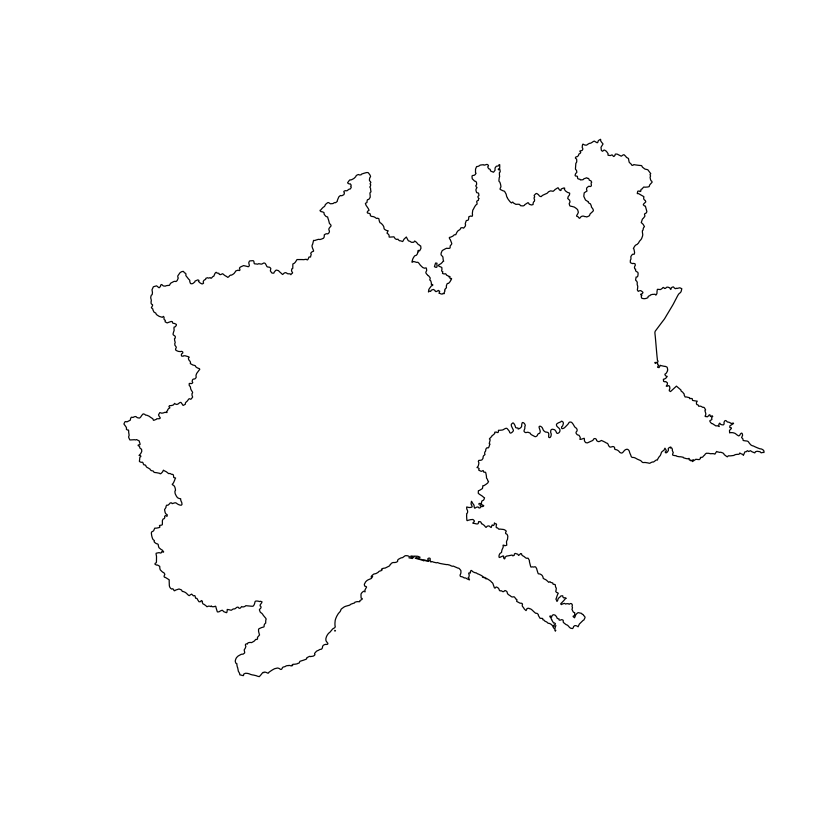

In [24]:
plot(macroregions$geometry[[1]])

In [25]:
macroregions$DEN_RIP[[2]]


[1] "Nord-est"

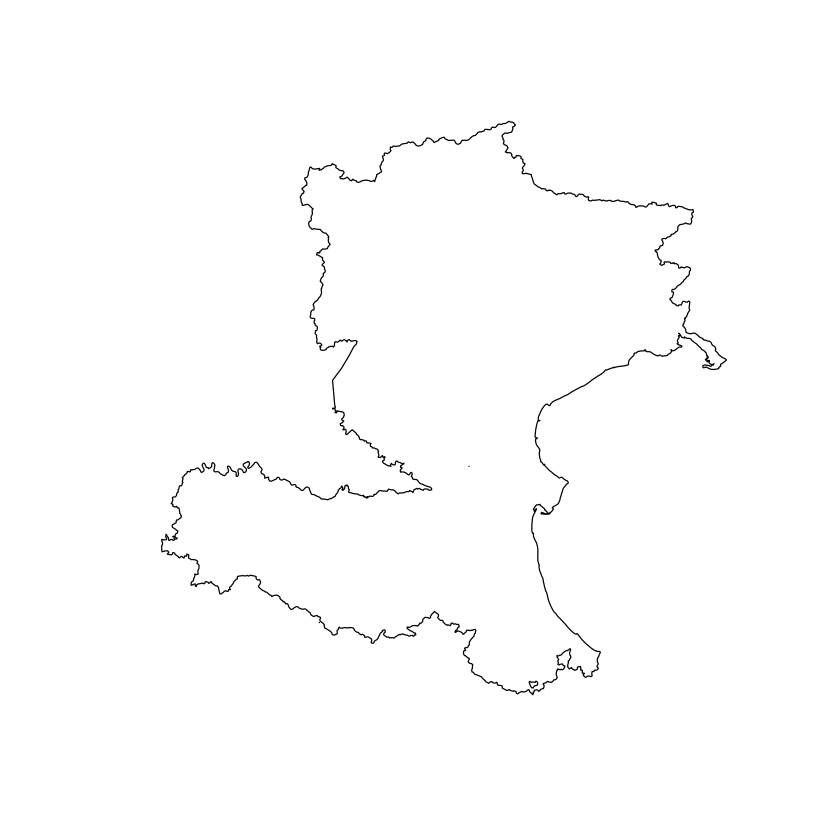

In [26]:
plot(macroregions$geometry[[2]])

In [27]:
macroregions$DEN_RIP[[3]]


[1] "Centro"

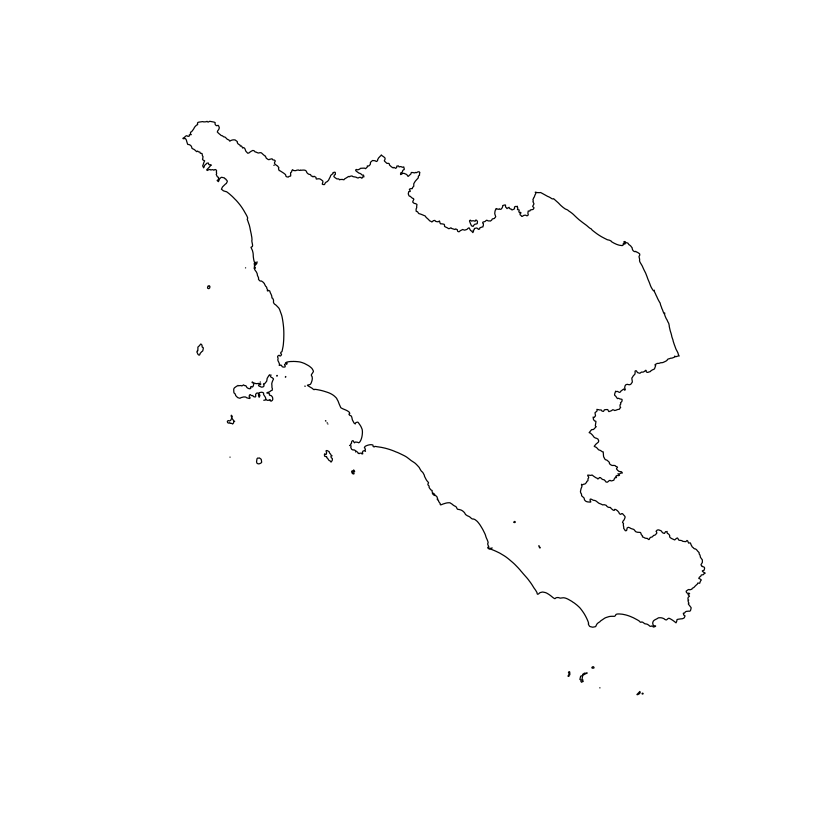

In [28]:
plot(macroregions$geometry[[3]])

In [29]:
macroregions$DEN_RIP[[4]]


[1] "Sud"

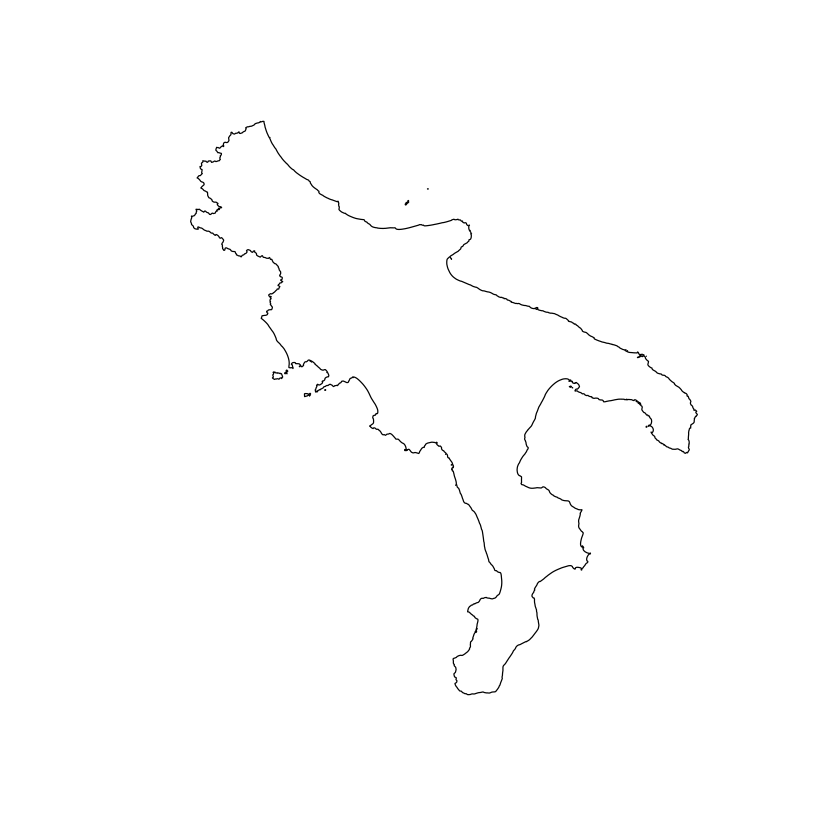

In [30]:
plot(macroregions$geometry[[4]])

In [31]:
macroregions$DEN_RIP[[5]]


[1] "Isole"

plot(macroregions$geometry[[5]])

verifica errori sulle geometrie

In [32]:
st_is_valid(macroregions)

[1]  TRUE FALSE  TRUE FALSE FALSE

In [33]:
macroregions$geometry <- st_make_valid(macroregions$geometry)

In [34]:
st_is_valid(macroregions)

[1] TRUE TRUE TRUE TRUE TRUE

#### conoscere la posizione del centroide per ogni geometria

In [35]:
st_centroid(macroregions$geometry)

POINT (478141.1 5011450)

POINT (702047.6 5039726)

POINT (756697.6 4757567)

POINT (1061529 4529739)

POINT (736449.9 4300341)

Registered S3 method overwritten by 'geojsonsf':
  method        from   
  print.geojson geojson



Geometry set for 5 features 
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: 478141.1 ymin: 4300341 xmax: 1061529 ymax: 5039726
Projected CRS: WGS 84 / UTM zone 32N

il formato di output delle geometrie è in [well knowtext format (WKT)](https://en.wikipedia.org/wiki/Well-known_text_representation_of_geometry)

ma ... come sono espresse le coordinate???
per saperlo dobbiamo conoscere il CRS - sistema di riferimento delle coordinate

# Proiezioni spaziali

**CRS** = *Coordinate Reference System*

## La terra non è PIATTA
### The true size
![](https://raw.githubusercontent.com/napo/sna_geospatial_datascience/refs/heads/main/images/truesize.gif)

https://thetruesize.com/

## Come convertire in latitude/longitude?

In [36]:
st_crs(macroregions)

Coordinate Reference System:
  User input: WGS 84 / UTM zone 32N 
  wkt:
PROJCRS["WGS 84 / UTM zone 32N",
    BASEGEOGCRS["WGS 84",
        DATUM["World Geodetic System 1984",
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["UTM zone 32N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["Degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",9,
            ANGLEUNIT["Degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at natural origin",0.9996,
            SCALEUNIT["unity",1],
            ID["EPSG",8805]],
        PARAMETER["False easting",500000,
            LENGTHUNIT["metre",1],
            ID["EPSG",8806]],
        PARAMETER["False n

## EPSG?
European Petroleum Survey Group  (1986-2005)<br/>
[IOGP](https://www.iogp.org/about-us/) - International Association of Oil & Gas Producers (2005-now)

EPSG ha dato vita al progetto [EPSG registry](http://www.epsg-registry.org/) - un dataset pubblico che contiene i parametri geodentici

[http://epsg.io/32632](http://epsg.io/32632)

![](https://github.com/napo/geospatial_course_unitn/raw/master/docs/assets/images/epsg32632.png)

![](https://upload.wikimedia.org/wikipedia/commons/b/b9/Usgs_map_traverse_mercator.PNG)

![](https://upload.wikimedia.org/wikipedia/commons/e/ed/Utm-zones.jpg)

In [37]:
st_transform(st_centroid(macroregions$geometry), crs = 4326)

POINT (8.721413 45.25621)

POINT (11.58533 45.4818)

POINT (12.14553 42.92751)

POINT (15.6472 40.72684)

POINT (11.72352 38.82014)



Geometry set for 5 features 
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: 8.721413 ymin: 38.82014 xmax: 15.6472 ymax: 45.4818
Geodetic CRS:  WGS 84

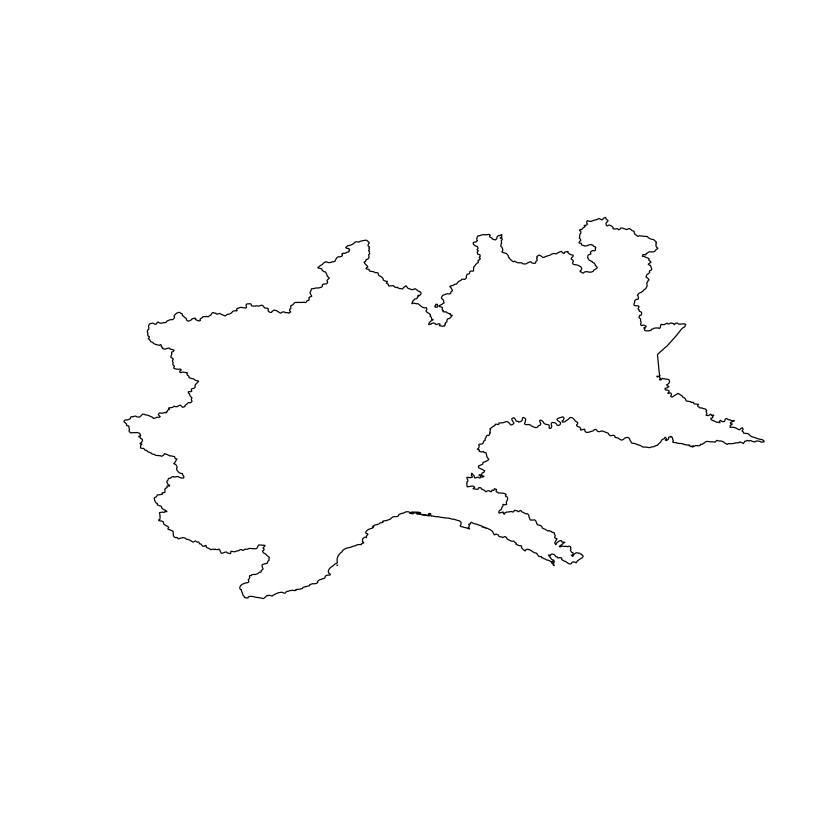

In [38]:
plot(st_geometry(st_transform(macroregions, 4326))[[1]])

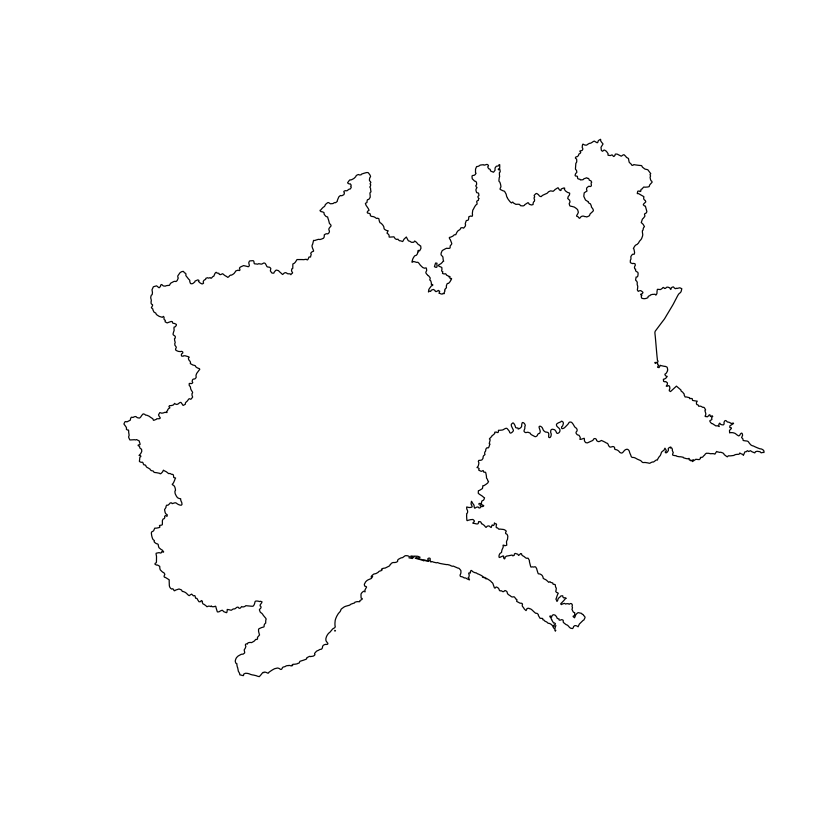

In [39]:
plot(st_geometry(macroregions)[[1]])

### WGS84 VS ETRS89

|  [WGS84](https://epsg.io/4326)  |  [ETRS89](https://epsg.io/4258) |
|---|---|
|  ![](https://github.com/napo/geospatial_course_unitn/blob/master/images/wgs84_coverage.png?raw=true) | ![](https://github.com/napo/geospatial_course_unitn/blob/master/images/etrs89_coverage.png?raw=true)  

## esplorare un file .prj

In [40]:
# Apre il file
con <- file("RipGeo01012024_g_WGS84.prj", open = "r")

# Legge tutto il contenuto
prj_content <- readLines(con)

# Chiude il file
close(con)

In [41]:
prj_content

[1] "PROJCS[\"WGS_1984_UTM_Zone_32N\",GEOGCS[\"GCS_WGS_1984\",DATUM[\"D_WGS_1984\",SPHEROID[\"WGS_1984\",6378137.0,298.257223563]],PRIMEM[\"Greenwich\",0.0],UNIT[\"Degree\",0.0174532925199433]],PROJECTION[\"Transverse_Mercator\"],PARAMETER[\"False_Easting\",500000.0],PARAMETER[\"False_Northing\",0.0],PARAMETER[\"Central_Meridian\",9.0],PARAMETER[\"Scale_Factor\",0.9996],PARAMETER[\"Latitude_Of_Origin\",0.0],UNIT[\"Meter\",1.0]]"

... come scritto qui

[http://epsg.io/32632.wkt](http://epsg.io/32632.wkt)

In [42]:
macroregions_4326 <- st_transform(macroregions, crs = 4326)

In [43]:
st_write(macroregions_4326, "macro_regions.geojson", driver = "GeoJSON")

Writing layer `macro_regions' to data source 
  `macro_regions.geojson' using driver `GeoJSON'
Writing 5 features with 4 fields and geometry type Multi Polygon.


In [44]:
macroregions$lon <- st_coordinates(
  st_centroid(
    st_transform(macroregions, 4326)
  )
)[, 1]

In [45]:
macroregions$lat <- st_coordinates(
  st_centroid(
    st_transform(macroregions, 4326)
  )
)[, 2]

In [46]:
macroregions

,COD_RIP,DEN_RIP,Shape_Leng,Shape_Area,geometry,lon,lat
,<dbl>,<chr>,<dbl>,<dbl>,<MULTIPOLYGON [m]>,<dbl>,<dbl>
1,1,Nord-ovest,2330675,57930826800,MULTIPOLYGON (((568191.2 48...,8.721396,45.25609
2,2,Nord-est,2313109,62396110675,MULTIPOLYGON (((618312.9 48...,11.584748,45.48132
3,3,Centro,2013166,58030006351,MULTIPOLYGON (((609424.8 46...,12.144714,42.92796
4,4,Sud,2535023,73781812999,MULTIPOLYGON (((1037260 444...,15.644280,40.72943
5,5,Isole,2793918,49930616360,MULTIPOLYGON (((449019.8 43...,11.716089,38.82431


In [47]:
st_write(macroregions_4326, "macroregions.kml", driver = "KML")

Writing layer `macroregions' to data source `macroregions.kml' using driver `KML'
Writing 5 features with 4 fields and geometry type Multi Polygon.


st_write(macroregions_4326, "macroregions.kml", driver = "KML")

---

# Esercizio

## Individuare e rappresentare la sola provincia "Sud Sardegna"

In [48]:
setwd("..")                      # Passa alla cartella superiore
setwd("ProvCM01012024_g")        # Entra in "ProvCM01012024_g"


In [49]:
provinces <- st_read("ProvCM01012024_g_WGS84.shp")

Reading layer `ProvCM01012024_g_WGS84' from data source 
  `/home/jovyan/Limiti01012024_g/ProvCM01012024_g/ProvCM01012024_g_WGS84.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 107 features and 12 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 313279.3 ymin: 3933826 xmax: 1312016 ymax: 5220292
Projected CRS: WGS 84 / UTM zone 32N


In [50]:
head(provinces, 5)

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,Shape_Leng,Shape_Area,geometry
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<MULTIPOLYGON [m]>
1,1,1,1,201,201,-,Torino,Torino,TO,Città metropolitana,539673.5,6828371660,MULTIPOLYGON (((411015.3 50...
2,1,1,2,0,2,Vercelli,-,Vercelli,VC,Provincia,417425.5,2082173021,MULTIPOLYGON (((438328.7 50...
3,1,1,3,0,3,Novara,-,Novara,NO,Provincia,250657.2,1340539672,MULTIPOLYGON (((460929.5 50...
4,1,1,4,0,4,Cuneo,-,Cuneo,CN,Provincia,489291.5,6898186048,MULTIPOLYGON (((378672.7 49...
5,1,1,5,0,5,Asti,-,Asti,AT,Provincia,312533.3,1508920341,MULTIPOLYGON (((425041.4 49...


In [51]:
names(provinces)

[1] "COD_RIP"    "COD_REG"    "COD_PROV"   "COD_CM"     "COD_UTS"   
 [6] "DEN_PROV"   "DEN_CM"     "DEN_UTS"    "SIGLA"      "TIPO_UTS"  
[11] "Shape_Leng" "Shape_Area" "geometry"

In [52]:
unique(provinces$DEN_PROV)

[1] "-"                     "Vercelli"              "Novara"               
 [4] "Cuneo"                 "Asti"                  "Alessandria"          
 [7] "Aosta"                 "Imperia"               "Savona"               
[10] "La Spezia"             "Varese"                "Como"                 
[13] "Sondrio"               "Bergamo"               "Brescia"              
[16] "Pavia"                 "Cremona"               "Mantova"              
[19] "Bolzano"               "Trento"                "Verona"               
[22] "Vicenza"               "Belluno"               "Treviso"              
[25] "Padova"                "Rovigo"                "Udine"                
[28] "Gorizia"               "Trieste"               "Piacenza"             
[31] "Parma"                 "Reggio nell'Emilia"    "Modena"               
[34] "Ferrara"               "Ravenna"               "Forli'-Cesena"        
[37] "Pesaro e Urbino"       "Ancona"                "Macerata"             
[40] "Ascoli Piceno"         "Massa Carrara"         "Lucca"                
[43] "Pistoia"               "Livorno"               "Pisa"                 
[46] "Arezzo"                "Siena"                 "Grosseto"             
[49] "Perugia"               "Terni"                 "Viterbo"              
[52] "Rieti"                 "Latina"                "Frosinone"            
[55] "Caserta"               "Benevento"             "Avellino"             
[58] "Salerno"               "L'Aquila"              "Teramo"               
[61] "Pescara"               "Chieti"                "Campobasso"           
[64] "Foggia"                "Taranto"               "Brindisi"             
[67] "Lecce"                 "Potenza"               "Matera"               
[70] "Cosenza"               "Catanzaro"             "Trapani"              
[73] "Agrigento"             "Caltanissetta"         "Enna"                 
[76] "Ragusa"                "Siracusa"              "Sassari"              
[79] "Nuoro"                 "Pordenone"             "Isernia"              
[82] "Oristano"              "Biella"                "Lecco"                
[85] "Lodi"                  "Rimini"                "Prato"                
[88] "Crotone"               "Vibo Valentia"         "Verbano-Cusio-Ossola" 
[91] "Monza e della Brianza" "Fermo"                 "Barletta-Andria-Trani"
[94] "Sud Sardegna"

In [53]:
provincia_sudsardegna <- provinces[provinces$DEN_PROV == "Sud Sardegna", ]

plot(provincia_sudsardegna$geometry)

## Quali sono i comuni della Sud Sardegna?


In [54]:
setwd("..")                 # Torna alla directory superiore
setwd("Com01012024_g")      # Entra nella cartella "Com01012024_g"


In [55]:
comuni_italia <- st_read("Com01012024_g_WGS84.shp")

Reading layer `Com01012024_g_WGS84' from data source 
  `/home/jovyan/Limiti01012024_g/Com01012024_g/Com01012024_g_WGS84.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 7899 features and 12 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 313279.3 ymin: 3933826 xmax: 1312016 ymax: 5220292
Projected CRS: WGS 84 / UTM zone 32N


In [56]:
head(comuni_italia, 5)

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,Shape_Leng,Shape_Area,geometry
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<MULTIPOLYGON [m]>
1,1,1,1,0,201,1001,001001,Agliè,0,0,16075.20,13285068,MULTIPOLYGON (((404703.6 50...
2,1,1,1,0,201,1002,001002,Airasca,0,0,16695.88,15781858,MULTIPOLYGON (((380700.9 49...
3,1,1,1,0,201,1003,001003,Ala di Stura,0,0,29346.88,45764779,MULTIPOLYGON (((364710.9 50...
4,1,1,1,0,201,1004,001004,Albiano d'Ivrea,0,0,16065.85,11376416,MULTIPOLYGON (((415942.5 50...
5,1,1,1,0,201,1006,001006,Almese,0,0,16129.78,17796123,MULTIPOLYGON (((376934.6 49...


codice della provincia Sud Sardegna

In [57]:
provincia_sudsardegna$COD_PROV

[1] 111

In [58]:
comuni_sudsardegna <- comuni_italia[comuni_italia$COD_PROV == provincia_sudsardegna$COD_PROV[1], ]


In [59]:
head(comuni_sudsardegna,3)

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,Shape_Leng,Shape_Area,geometry
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<MULTIPOLYGON [m]>
4909,5,20,111,0,111,111001,111001,Arbus,0,0,115393.60,268812292,MULTIPOLYGON (((453465.8 44...
4910,5,20,111,0,111,111002,111002,Armungia,0,0,35060.55,54951833,MULTIPOLYGON (((540967.1 43...
4911,5,20,111,0,111,111003,111003,Ballao,0,0,33280.75,46212950,MULTIPOLYGON (((536131.2 43...


In [60]:
dim(comuni_sudsardegna)

[1] 107  13

In [61]:
message(sprintf("Il totale dei comuni della Sud Sardegna sono %d", nrow(comuni_sudsardegna)))

Il totale dei comuni della Sud Sardegna sono 107



## il comune con l'estensione più grande e quello con l'estensione più piccola

In [62]:
# Calcola l'area delle geometrie
comuni_sudsardegna$area <- as.numeric(st_area(comuni_sudsardegna))

In [63]:
names(comuni_sudsardegna)

[1] "COD_RIP"    "COD_REG"    "COD_PROV"   "COD_CM"     "COD_UTS"   
 [6] "PRO_COM"    "PRO_COM_T"  "COMUNE"     "COMUNE_A"   "CC_UTS"    
[11] "Shape_Leng" "Shape_Area" "geometry"   "area"

In [64]:
# Trova l'indice della riga con il valore minimo nella colonna 'area'
min_index <- which.min(comuni_sudsardegna$area)

# Filtra il dataframe per selezionare la riga con l'area minima
piccolo <- comuni_sudsardegna[min_index, ]

In [65]:
piccolo

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,Shape_Leng,Shape_Area,geometry,area
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<MULTIPOLYGON [m]>,<dbl>
7826,5,20,111,0,111,111024,111024,Genuri,0,0,10887.85,7602358,MULTIPOLYGON (((493668.5 44...,7602358


In [66]:
piccolo$COMUNE

[1] "Genuri"

In [67]:
# Trova l'indice della riga con il valore minimo nella colonna 'area'
max_index <- which.max(comuni_sudsardegna$area)

# Filtra il dataframe per selezionare la riga con l'area minima
grande <- comuni_sudsardegna[max_index, ]

In [68]:
grande$COMUNE

[1] "Arbus"

## estrazione delle coordinate del centroide in lat/long

In [69]:
# Trasforma in EPSG:4326 e calcola il centroide come oggetto sf
piccolo_4326_centroid <- st_centroid(st_transform(piccolo, 4326))
grande_4326_centroid  <- st_centroid(st_transform(grande, 4326))

# Estrai la singola geometria dal centroide
centroide_genuri <- st_geometry(piccolo_4326_centroid)[[1]]
centroide_arbus  <- st_geometry(grande_4326_centroid)[[1]]

In [70]:
# Estrae le coordinate come matrice (una sola riga, due colonne)
coords_genuri <- st_coordinates(centroide_genuri)

cat("Centroide di Genuri\n")
cat(sprintf("longitudine: %f\n", coords_genuri[1, 1]))
cat(sprintf("latitudine: %f\n", coords_genuri[1, 2]))

Centroide di Genuri
longitudine: 8.922958
latitudine: 39.740091


In [71]:
puntosignificativo_genuri <- st_point_on_surface(st_transform(piccolo, crs = 4326))
puntosignificativo_arbus  <- st_point_on_surface(st_transform(grande, crs = 4326))

In [72]:
# Stampare le coordinate del punto significativo di Genuri
cat("Punto significativo di Genuri\n")
coords_genuri_significativo <- st_coordinates(puntosignificativo_genuri)
coords_arbus_significativo  <- st_coordinates(puntosignificativo_arbus)

# Stampa le coordinate di Genuri
cat("Punto significativo di Genuri\n")
cat(sprintf("longitudine: %f\n", coords_genuri_significativo[1, "X"]))
cat(sprintf("latitudine: %f\n", coords_genuri_significativo[1, "Y"]))

Punto significativo di Genuri
Punto significativo di Genuri
longitudine: 8.924991
latitudine: 39.741215


### l'importanza di un punto significativo
![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/umap_liguria.jpg)

Vedi questa [mappa](https://umap.openstreetmap.fr/it/map/liguria_505528#8/44.129/9.146)